In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import pysr

In [3]:
filenames = glob.glob("data/stress-strain-curves/T*.csv")

In [4]:
filenames

['data/stress-strain-curves\\T_020_A_1_001_022_03.csv',
 'data/stress-strain-curves\\T_020_A_2_002_024_04.csv',
 'data/stress-strain-curves\\T_020_A_3_003_025_05.csv',
 'data/stress-strain-curves\\T_020_B_1_004_059_01.csv',
 'data/stress-strain-curves\\T_020_B_2_005_061_02.csv',
 'data/stress-strain-curves\\T_020_B_3_006_063_03.csv',
 'data/stress-strain-curves\\T_020_C_1_007_045_01.csv',
 'data/stress-strain-curves\\T_020_C_2_008_046_02.csv',
 'data/stress-strain-curves\\T_020_C_3_009_047_03.csv',
 'data/stress-strain-curves\\T_020_D_1_010_064_01.csv',
 'data/stress-strain-curves\\T_020_D_2_011_065_02.csv',
 'data/stress-strain-curves\\T_020_D_3_012_066_03.csv',
 'data/stress-strain-curves\\T_020_E_1_013_071_03.csv',
 'data/stress-strain-curves\\T_020_E_2_014_097_04.csv',
 'data/stress-strain-curves\\T_020_E_3_015_098_05.csv',
 'data/stress-strain-curves\\T_020_F_1_016_134_26.csv',
 'data/stress-strain-curves\\T_020_G_1_020_139_27.csv',
 'data/stress-strain-curves\\T_020_H_1_024_131_2

temp: 020 | lot: B | specimen: 1


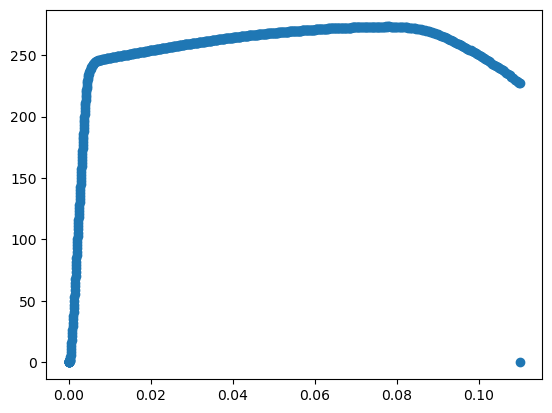

temp: 100 | lot: B | specimen: 1


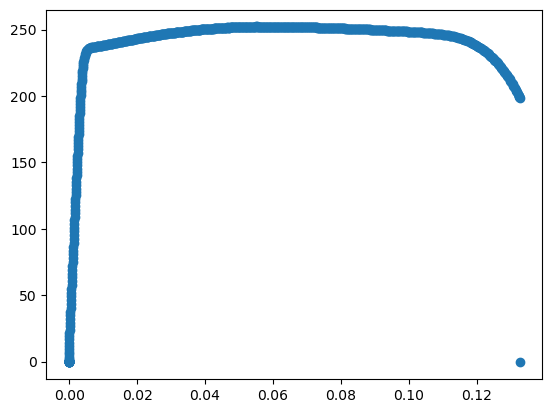

temp: 150 | lot: B | specimen: 1


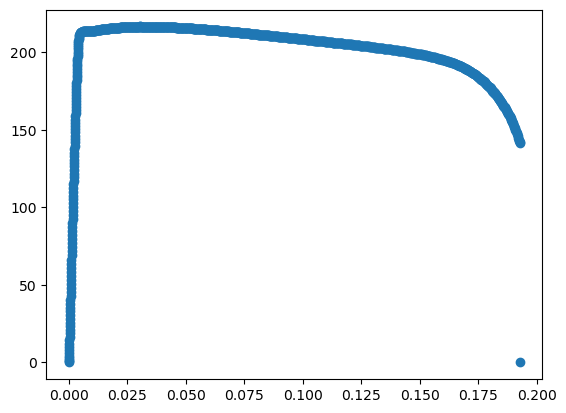

temp: 200 | lot: B | specimen: 1


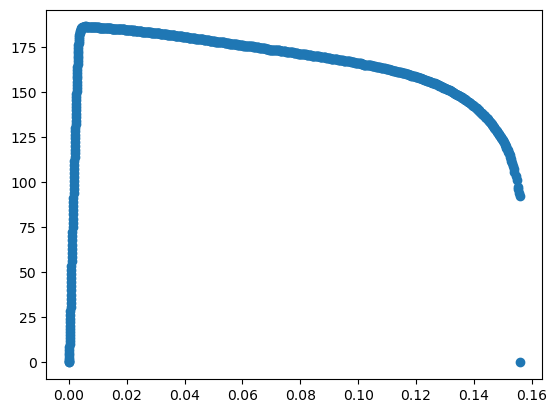

temp: 250 | lot: B | specimen: 1


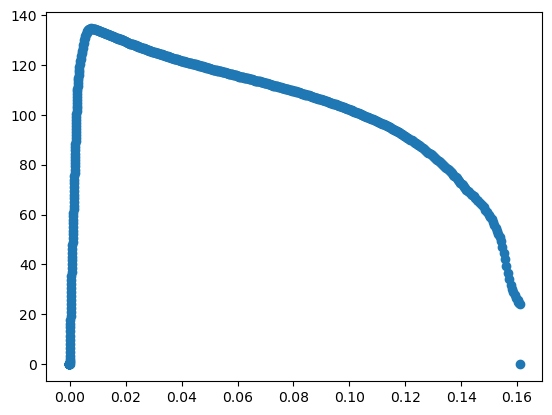

temp: 300 | lot: B | specimen: 1


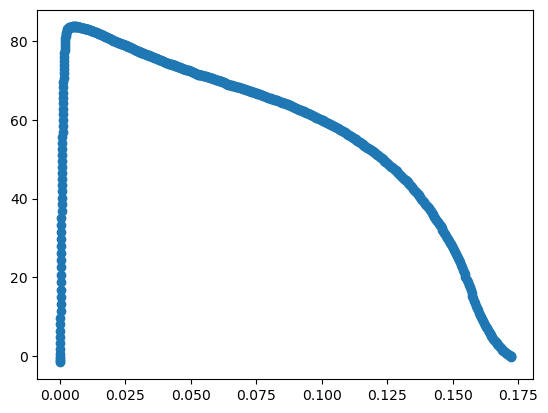

In [19]:
for filename in filenames:
    df = pd.read_csv(filename)
    dataset_name = filename.split('T_')[1].split('.csv')[0]
    parts = dataset_name.split('_')
    temp = parts[0]
    lot = parts[1]
    specimen = parts[2]
    if lot == 'B' and specimen == '1':
        print(f"temp: {temp} | lot: {lot} | specimen: {specimen}")
        plt.scatter(data=df,x='Strain',y='Stress_MPa')
        plt.show()

In [7]:
df = pd.read_csv(filenames[0])

In [20]:
# We choose B1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Strain      614 non-null    float64
 1   Stress_MPa  614 non-null    float64
dtypes: float64(2)
memory usage: 9.7 KB


In [2]:
chosen_files = glob.glob("data/stress-strain-curves/T_*_B_1_*.csv")

In [3]:
chosen_files

['data/stress-strain-curves\\T_020_B_1_004_059_01.csv',
 'data/stress-strain-curves\\T_100_B_1_035_060_06.csv',
 'data/stress-strain-curves\\T_150_B_1_066_104_05.csv',
 'data/stress-strain-curves\\T_200_B_1_097_068_11.csv',
 'data/stress-strain-curves\\T_250_B_1_128_105_10.csv',
 'data/stress-strain-curves\\T_300_B_1_159_080_16.csv']

In [4]:
filename = chosen_files[0]
df = pd.read_csv(filename)
X = df[['Strain']]
y = df['Stress_MPa']

In [5]:
model = pysr.PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(x, y) = (x - y)^2",
    # ^ Custom loss function (julia syntax)
)

In [6]:
model.fit(X,y)

C:\Users\krkac\Miniconda3\envs\esr\lib\site-packages\pysr\sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


KeyboardInterrupt: 